In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import joblib
import warnings
warnings.filterwarnings('ignore')


In [29]:
print("🎓 Student Performance Data Preprocessing")
print("=" * 50)
print("\n📊 Step 1: Loading Data")
print("-" * 25)

🎓 Student Performance Data Preprocessing

📊 Step 1: Loading Data
-------------------------


In [30]:
df = pd.read_csv('StudentPerformanceFactors.csv')

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

Dataset shape: (6607, 20)
Columns: ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Exam_Score']


In [31]:
print("\n📋 Dataset Info:")
df.info()

print(f"\n❌ Missing values:\n{df.isnull().sum()}")



📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              660

In [32]:
print("\n🔍 First 5 rows:")
display(df.head())


🔍 First 5 rows:


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [33]:
print("\n🧹 Step 2: Data Cleaning")
print("-" * 28)
if df.isnull().sum().sum() > 0:
    print("Handling missing values...")
    df = df.dropna()
    print(f"Rows after cleaning: {len(df)}")
else:
    print("✅ No missing values found!")


🧹 Step 2: Data Cleaning
----------------------------
Handling missing values...
Rows after cleaning: 6378


In [34]:
print("\n🏷️ Categorical columns and their unique values:")
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_columns:
    unique_vals = df[col].unique()
    print(f"{col}: {len(unique_vals)} unique values - {unique_vals[:5]}...")


🏷️ Categorical columns and their unique values:
Parental_Involvement: 3 unique values - ['Low' 'Medium' 'High']...
Access_to_Resources: 3 unique values - ['High' 'Medium' 'Low']...
Extracurricular_Activities: 2 unique values - ['No' 'Yes']...
Motivation_Level: 3 unique values - ['Low' 'Medium' 'High']...
Internet_Access: 2 unique values - ['Yes' 'No']...
Family_Income: 3 unique values - ['Low' 'Medium' 'High']...
Teacher_Quality: 3 unique values - ['Medium' 'High' 'Low']...
School_Type: 2 unique values - ['Public' 'Private']...
Peer_Influence: 3 unique values - ['Positive' 'Negative' 'Neutral']...
Learning_Disabilities: 2 unique values - ['No' 'Yes']...
Parental_Education_Level: 3 unique values - ['High School' 'College' 'Postgraduate']...
Distance_from_Home: 3 unique values - ['Near' 'Moderate' 'Far']...
Gender: 2 unique values - ['Male' 'Female']...


In [35]:
print("\n⚙️ Step 3: Encoding Categorical Variables")
print("-" * 42)
label_encoders = {}
df_processed = df.copy()

for col in categorical_columns:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"✅ Encoded {col}")



⚙️ Step 3: Encoding Categorical Variables
------------------------------------------
✅ Encoded Parental_Involvement
✅ Encoded Access_to_Resources
✅ Encoded Extracurricular_Activities
✅ Encoded Motivation_Level
✅ Encoded Internet_Access
✅ Encoded Family_Income
✅ Encoded Teacher_Quality
✅ Encoded School_Type
✅ Encoded Peer_Influence
✅ Encoded Learning_Disabilities
✅ Encoded Parental_Education_Level
✅ Encoded Distance_from_Home
✅ Encoded Gender


In [36]:
joblib.dump(label_encoders, 'label_encoders.pkl')
print("📁 Saved label encoders to 'label_encoders.pkl'")

📁 Saved label encoders to 'label_encoders.pkl'


In [37]:
print("\n🎯 Step 4: Feature Selection")
print("-" * 32)
feature_columns = [
    'Hours_Studied', 'Attendance', 'Previous_Scores', 'Sleep_Hours',
    'Tutoring_Sessions', 'Physical_Activity', 'Parental_Involvement',
    'Access_to_Resources', 'Motivation_Level', 'Internet_Access',
    'Teacher_Quality', 'Peer_Influence'
]

X = df_processed[feature_columns]
y = df_processed['Exam_Score']

print(f"Selected features: {len(feature_columns)}")
print(f"Feature matrix shape: {X.shape}")
print(f"Target variable: Exam_Score (range: {y.min()}-{y.max()})")


🎯 Step 4: Feature Selection
--------------------------------
Selected features: 12
Feature matrix shape: (6378, 12)
Target variable: Exam_Score (range: 55-101)


In [38]:
print("\n🔗 Step 5: Correlation Analysis")
print("-" * 34)
correlations = X.corrwith(y).abs().sort_values(ascending=False)
print("📊 Feature correlations with Exam Score:")
for feature, corr in correlations.head(8).items():
    print(f"   {feature:25}: {corr:.3f}")



🔗 Step 5: Correlation Analysis
----------------------------------
📊 Feature correlations with Exam Score:
   Attendance               : 0.580
   Hours_Studied            : 0.445
   Previous_Scores          : 0.174
   Tutoring_Sessions        : 0.157
   Peer_Influence           : 0.099
   Parental_Involvement     : 0.094
   Access_to_Resources      : 0.088
   Teacher_Quality          : 0.059


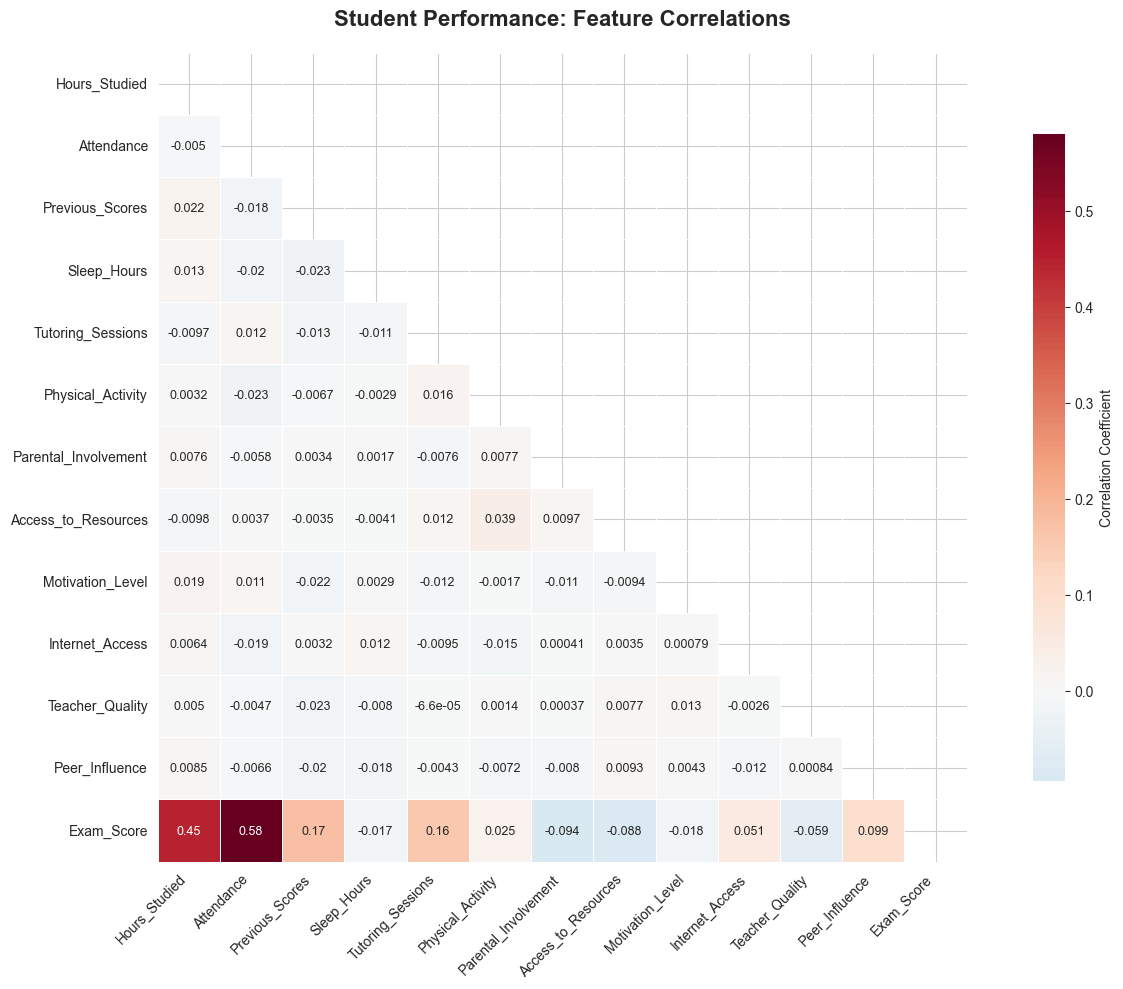

In [39]:
plt.figure(figsize=(14, 10))
correlation_matrix = df_processed[feature_columns + ['Exam_Score']].corr()


mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  

sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, annot_kws={'size': 9},
            cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"})

plt.title('Student Performance: Feature Correlations', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

In [40]:
print("\n🔄 Step 6: Train-Test Split")
print("-" * 30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")



🔄 Step 6: Train-Test Split
------------------------------
Training set: 5102 samples
Test set: 1276 samples


In [41]:
print("\n🤖 Step 7: Training Models")
print("-" * 30)
print("Training Linear Regression...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_mae = mean_absolute_error(y_test, y_pred_lr)

print(f"   Linear Regression - R²: {lr_r2:.3f}, RMSE: {lr_rmse:.3f}")



🤖 Step 7: Training Models
------------------------------
Training Linear Regression...
   Linear Regression - R²: 0.646, RMSE: 2.344


In [42]:
print("Training Random Forest...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_mae = mean_absolute_error(y_test, y_pred_rf)

print(f"   Random Forest - R²: {rf_r2:.3f}, RMSE: {rf_rmse:.3f}")


Training Random Forest...
   Random Forest - R²: 0.617, RMSE: 2.441


In [43]:
print("\n💾 Step 8: Saving Models and Data")
print("-" * 37)
joblib.dump(lr_model, 'linear_regression_model.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')
print("✅ Saved models:")
print("   - linear_regression_model.pkl")
print("   - random_forest_model.pkl")


💾 Step 8: Saving Models and Data
-------------------------------------
✅ Saved models:
   - linear_regression_model.pkl
   - random_forest_model.pkl


In [44]:
processed_data_info = {
    'feature_columns': feature_columns,
    'categorical_columns': categorical_columns,
    'feature_stats': X.describe().to_dict(),
    'target_stats': {
        'min': float(y.min()),
        'max': float(y.max()),
        'mean': float(y.mean()),
        'std': float(y.std())
    },
    'model_performance': {
        'linear_regression': {'r2': lr_r2, 'rmse': lr_rmse, 'mae': lr_mae},
        'random_forest': {'r2': rf_r2, 'rmse': rf_rmse, 'mae': rf_mae}
    }
}

joblib.dump(processed_data_info, 'model_info.pkl')
print("✅ Saved model information to 'model_info.pkl'")


✅ Saved model information to 'model_info.pkl'


In [45]:
print("\n🎯 Step 9: Feature Importance Analysis")
print("-" * 40)
lr_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': lr_model.coef_,
    'Abs_Coefficient': np.abs(lr_model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("📊 Linear Regression Feature Importance:")
for idx, row in lr_importance.head(6).iterrows():
    print(f"   {row['Feature']:25}: {row['Coefficient']:8.3f}")


🎯 Step 9: Feature Importance Analysis
----------------------------------------
📊 Linear Regression Feature Importance:
   Internet_Access          :    0.898
   Peer_Influence           :    0.523
   Tutoring_Sessions        :    0.489
   Access_to_Resources      :   -0.410
   Parental_Involvement     :   -0.391
   Hours_Studied            :    0.291


In [46]:
rf_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\n🌳 Random Forest Feature Importance:")
for idx, row in rf_importance.head(6).iterrows():
    print(f"   {row['Feature']:25}: {row['Importance']:8.3f}")


🌳 Random Forest Feature Importance:
   Attendance               :    0.391
   Hours_Studied            :    0.256
   Previous_Scores          :    0.104
   Tutoring_Sessions        :    0.047
   Physical_Activity        :    0.035
   Sleep_Hours              :    0.034


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, 
                   subplot_titles=('<b>Linear Regression</b><br>Feature Importance', 
                                  '<b>Random Forest</b><br>Feature Importance'),
                   horizontal_spacing=0.2)

fig.add_trace(go.Bar(y=lr_importance['Feature'][:8],
                    x=lr_importance['Abs_Coefficient'][:8],
                    orientation='h',
                    name='Linear Regression',
                    marker_color='#1f77b4'),
             row=1, col=1)

fig.add_trace(go.Bar(y=rf_importance['Feature'][:8],
                    x=rf_importance['Importance'][:8],
                    orientation='h',
                    name='Random Forest',
                    marker_color='#ff7f0e'),
             row=1, col=2)

fig.update_layout(
    height=600,
    width=1200,
    showlegend=False,
    title_text="<b>FEATURE IMPORTANCE COMPARISON</b>",
    title_font_size=20,
    title_x=0.5,
    title_y=0.95,
    title_yanchor='top',
    margin=dict(l=50, r=50, t=150, b=50)
)

fig.update_xaxes(
    title_text="Absolute Coefficient Value", 
    row=1, col=1,
    title_font_size=12
)
fig.update_xaxes(
    title_text="Importance Score", 
    row=1, col=2,
    title_font_size=12
)

fig.update_yaxes(
    tickfont_size=11,
    row=1, col=1
)
fig.update_yaxes(
    tickfont_size=11,
    row=1, col=2
)

fig.write_image("feature_importance.png", 
               width=1200, 
               height=700,
               scale=2,
               engine="kaleido")

fig.show()